# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Import essential libraries
# Data handling
import numpy as np # v1.26.4
import pandas as pd # v2.2.2

# Visualization
import seaborn as sns # v0.13.2
import matplotlib.pyplot as plt # v3.10.0

# Image processing
from PIL import Image # v11.1.0

# Machine Learning & Deep Learning
import tensorflow as tf # v2.18.0
from tensorflow.keras.datasets import cifar10
from tensorflow import keras # v3.8.0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Model evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix # v1.6.

Load the dataset.

In [2]:
# Load and unzip the dataset
import zipfile
import os

# Replace 'your_dataset.zip' with your actual file name
zip_file_path = 'data.zip'
extract_to_dir = 'dataset'

# Create the directory if it doesn't exist
os.makedirs(extract_to_dir, exist_ok=True)

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

print(f"Dataset extracted to '{extract_to_dir}' directory.")

Dataset extracted to 'dataset' directory.


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [63]:
# Create a function to load the raw images

def load_images_from_folder(folder_path, img_size=(150, 150)):
    images = []
    labels = []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

In [64]:
dataset_path= r'C:\Users\Hemanth_K_S\Downloads\Upgrad_CNN\dataset\data'

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [65]:
import os
import cv2

# Get the images and their labels
images, labels = load_images_from_folder(dataset_path)

# Verify the loaded data
print(f"Loaded images shape: {images.shape}")
print(f"Loaded labels shape: {labels.shape}")
print(f"Unique labels: {np.unique(labels)}")

Loaded images shape: (7625, 150, 150, 3)
Loaded labels shape: (7625,)
Unique labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

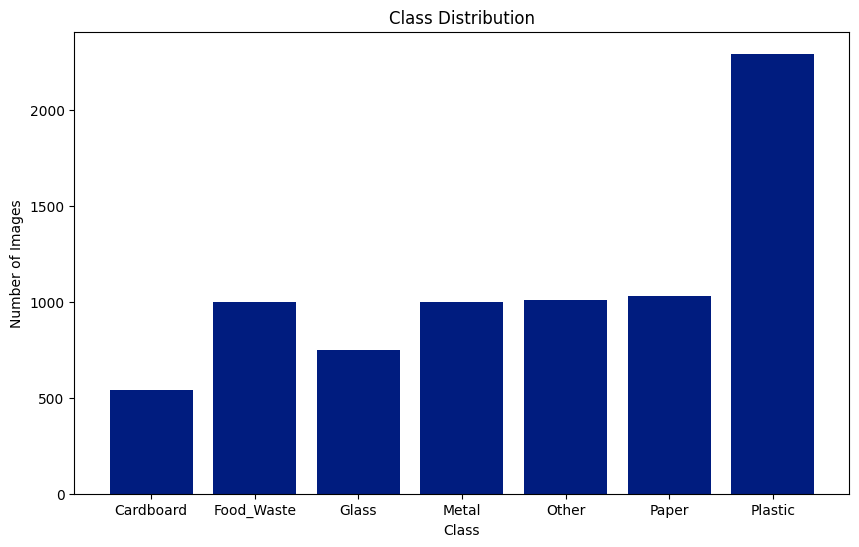

In [56]:
# Visualise Data Distribution
unique_labels, counts = np.unique(labels, return_counts=True)
sns.set_palette("dark")
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

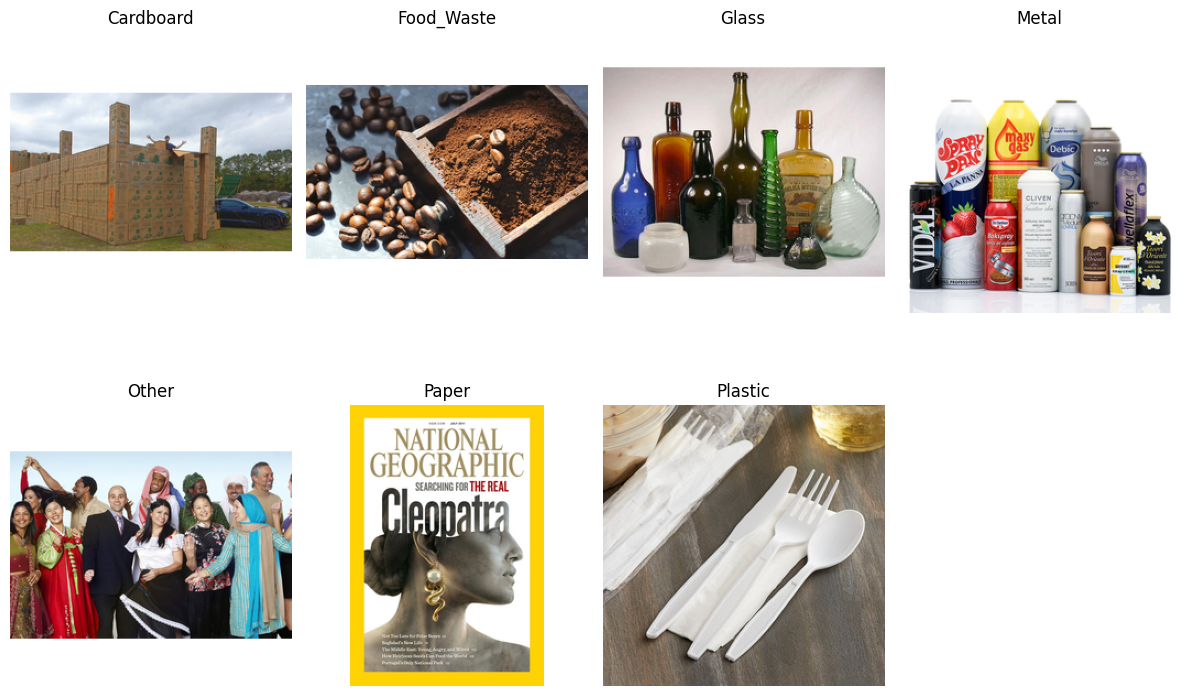

In [57]:
# Visualise Sample Images (across different labels)
plt.figure(figsize=(12, 8))
for i, label in enumerate(unique_labels):
    idx = np.where(labels == label)[0][0]
    plt.subplot(2, 4, i + 1)
    plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [62]:
# Find the smallest and largest image dimensions from the data set
image_shapes = [img.shape for img in images]
min_shape = np.min(image_shapes, axis=0)
max_shape = np.max(image_shapes, axis=0)
print(f"Smallest image dimensions: {min_shape}")
print(f"Largest image dimensions: {max_shape}")

Smallest image dimensions: [256 256   3]
Largest image dimensions: [256 256   3]


In [61]:
# Resize the image dimensions
resized_images = np.array([cv2.resize(img, (200, 200)) for img in images])
print(f"Resized images shape: {resized_images.shape}")

Resized images shape: (7625, 200, 200, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

#### **2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [60]:
# Encode the labels suitably
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
print(f"Encoded labels: {encoded_labels}")
print(f"Label classes: {label_encoder.classes_}")

Encoded labels: [0 0 0 ... 6 6 6]
Label classes: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [14]:
# Assign specified parts of the dataset to train and validation sets

import shutil

# Define the path to the dataset
dataset_path = "dataset/data"

# Define the categories
categories = ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']

# Define the ratio of images to be allocated for the test set
test_size = 0.2

# Create directories for the training and test sets
train_dir = "train_dataset"
test_dir = "test_dataset"

for base_dir in [train_dir, test_dir]:
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    for category in categories:
        category_dir = os.path.join(base_dir, category)
        os.makedirs(category_dir, exist_ok=True)

# Loop through each category
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = os.listdir(category_path)

    # Split the image files into training and test sets
    train_images, test_images = train_test_split(image_files, test_size=test_size, random_state=42)

    # Copy training images to the train dataset directory
    for img_file in train_images:
        src_path = os.path.join(category_path, img_file)
        dest_path = os.path.join(train_dir, category, img_file)
        shutil.copy(src_path, dest_path)

    # Copy test images to the test dataset directory
    for img_file in test_images:
        src_path = os.path.join(category_path, img_file)
        dest_path = os.path.join(test_dir, category, img_file)
        shutil.copy(src_path, dest_path)


print("Dataset split into training and test sets successfully with category subdirectories.")

Dataset split into training and test sets successfully with category subdirectories.


In [15]:
def count_images_in_split(folder):
    print(f"Folder: {folder}")
    classes = []
    for root, dirs, files in os.walk(folder):
        for dir in dirs:
            classes.append(dir)
    print(f"Classes: {classes}")
    for class_name in classes:
        class_path = os.path.join(folder, class_name)
        num_images = len(os.listdir(class_path))
        print(f"Class: {class_name} - Number of Images: {num_images}")

# Verify the number of images in each split for each class
print("Training Set:")
count_images_in_split('train_dataset/')

print("\nTest Set:")
count_images_in_split('test_dataset/')

Training Set:
Folder: train_dataset/
Classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
Class: Cardboard - Number of Images: 432
Class: Food_Waste - Number of Images: 800
Class: Glass - Number of Images: 600
Class: Metal - Number of Images: 800
Class: Other - Number of Images: 808
Class: Paper - Number of Images: 824
Class: Plastic - Number of Images: 1836

Test Set:
Folder: test_dataset/
Classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
Class: Cardboard - Number of Images: 108
Class: Food_Waste - Number of Images: 200
Class: Glass - Number of Images: 150
Class: Metal - Number of Images: 200
Class: Other - Number of Images: 202
Class: Paper - Number of Images: 206
Class: Plastic - Number of Images: 459


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [68]:
# Build and compile the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define image dimensions
img_height = 512
img_width = 384

# Define the model
model_custom = Sequential()

# 1st Convolutional Block
model_custom.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_custom.add(BatchNormalization())
model_custom.add(MaxPooling2D(pool_size=(2, 2)))
model_custom.add(Dropout(0.5))

# 2nd Convolutional Block
model_custom.add(Conv2D(64, (3, 3), activation='relu'))
model_custom.add(BatchNormalization())
model_custom.add(MaxPooling2D(pool_size=(2, 2)))
model_custom.add(Dropout(0.5))

# 3rd Convolutional Block
model_custom.add(Conv2D(128, (3, 3), activation='relu'))
model_custom.add(BatchNormalization())
model_custom.add(MaxPooling2D(pool_size=(2, 2)))
model_custom.add(Dropout(0.5))

# Fully Connected Layers
model_custom.add(Flatten())
model_custom.add(Dense(1024, activation='relu'))
model_custom.add(Dropout(0.5))
model_custom.add(Dense(7, activation='softmax'))  # 7 output classes

# Compile the model
model_custom.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary (optional)
model_custom.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_103 (Ba  (None, 30, 30, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_104 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_104 (Ba  (None, 13, 13, 64)      

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the training and test datasets
train_dir = "train_dataset/"
test_dir = "test_dataset/"

# Define image dimensions
img_height = 512
img_width = 384
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation/Test Data Generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow validation images in batches using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6100 images belonging to 7 classes.
Found 1525 images belonging to 7 classes.


In [18]:
# Evaluate on the test set; display suitable metrics
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the InceptionV3 model pretrained on ImageNet without the top layer
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add new top layers for classification
x = base_model_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions_inception = Dense(7, activation='softmax')(x)  # 7 output classes for the dataset

# Define the new model
model_inception = Model(inputs=base_model_inception.input, outputs=predictions_inception)

# Freeze the layers of the pretrained model
for layer in base_model_inception.layers:
    layer.trainable = False

# Compile the model
model_inception.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_inception = model_inception.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
191/191 [==============================] - 765s 4s/step - loss: 0.9195 - accuracy: 0.6890 - val_loss: 0.5130 - val_accuracy: 0.8236
Epoch 2/10
191/191 [==============================] - 781s 4s/step - loss: 0.5787 - accuracy: 0.8028 - val_loss: 0.4547 - val_accuracy: 0.8498
Epoch 3/10
191/191 [==============================] - 708s 4s/step - loss: 0.5321 - accuracy: 0.8198 - val_loss: 0.5075 - val_accuracy: 0.8282
Epoch 4/10
191/191 [==============================] - 721s 4s/step - loss: 0.4618 - accuracy: 0.8410 - val_loss: 0.4140 - val_accuracy: 0.8557
Epoch 5/10
191/191 [==============================] - 746s 4s/step - loss: 0.4334 - accuracy: 0.8492 - val_loss: 0.4407 - val_accuracy: 0.8400
Epoch 6/10
191/191 [==============================] - 746s 4s/step - loss: 0.4001 - accuracy: 0.8589 - val_loss: 0.3841 - val_accuracy: 0.8636
Epoch 7/10
191/191 [==============================] - 705s 4s/step - loss: 0.3812 - accuracy: 0.8652 - val_loss: 0.3930 - val_accuracy: 0.8734

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [19]:
# Evaluate on the test set; display suitable metrics

test_dir = "test_dataset/"

# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size= 32,
    class_mode='categorical'
)

# Evaluate the model on the test data
test_loss, test_accuracy = model_inception.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Found 1525 images belonging to 7 classes.
48/48 [==============================] - 93s 2s/step - loss: 0.3535 - accuracy: 0.8807
Test loss: 0.35347431898117065
Test accuracy: 0.8806557655334473


In [20]:
# save the model
model_inception.save("garbage_classification_model_inception.h5")

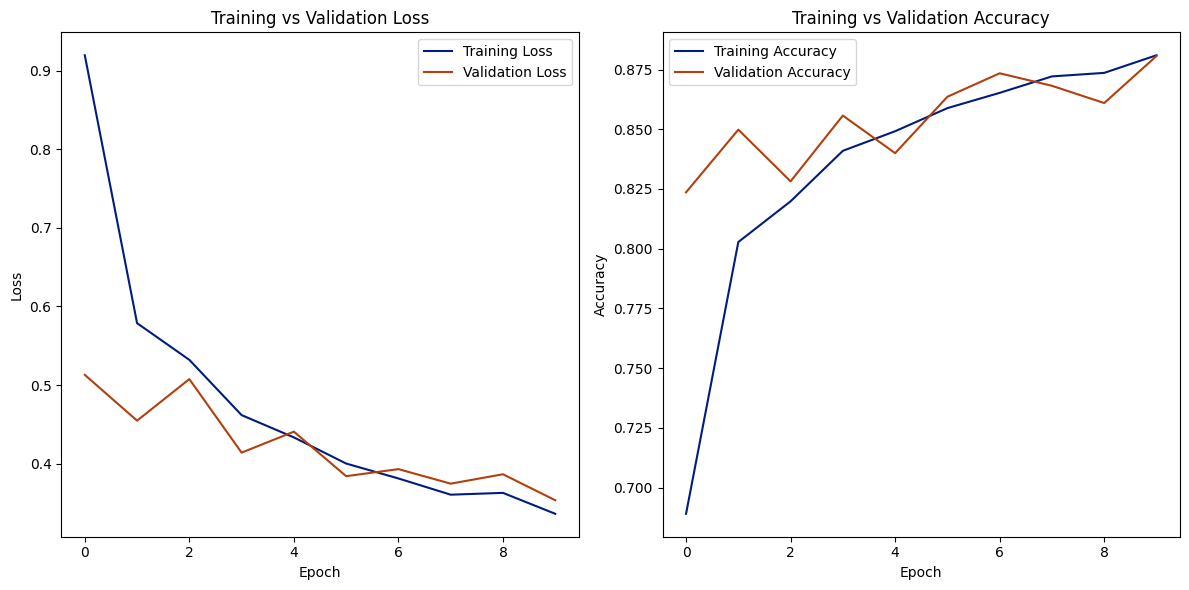

In [21]:
# Plot training vs validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['loss'], label='Training Loss')
plt.plot(history_inception.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot training vs validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_inception.history['accuracy'], label='Training Accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 115ms/step


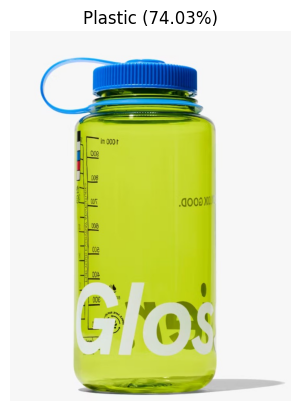

1/1 [==============================] - 0s 117ms/step


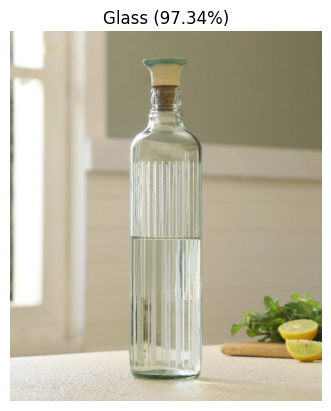

1/1 [==============================] - 0s 133ms/step


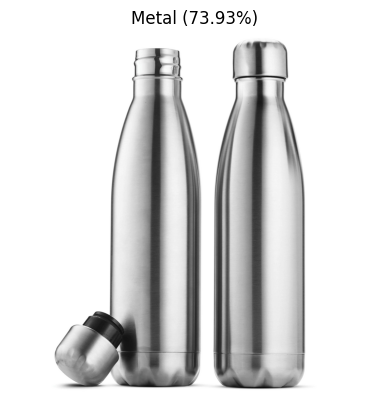

1/1 [==============================] - 0s 134ms/step


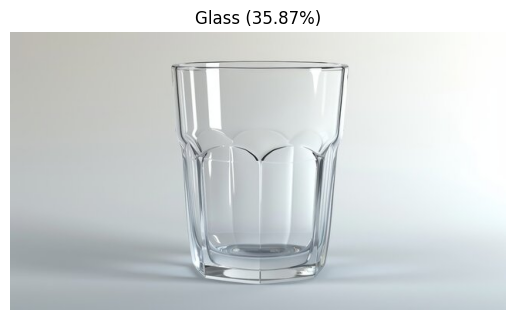

1/1 [==============================] - 0s 130ms/step


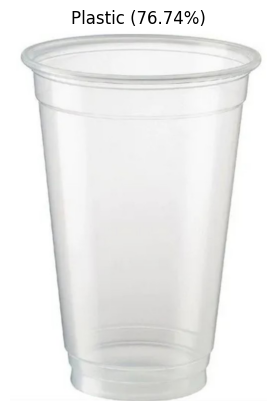

1/1 [==============================] - 0s 126ms/step


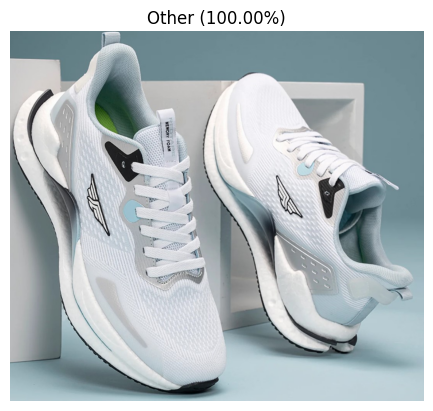

Image: hero.jpg → Predicted: Plastic (74.03%)
Image: hero1.jpg → Predicted: Glass (97.34%)
Image: hero2.jpg → Predicted: Metal (73.93%)
Image: hero3.jpg → Predicted: Glass (35.87%)
Image: hero4.jpg → Predicted: Plastic (76.74%)
Image: charan.jpg → Predicted: Other (100.00%)


In [46]:
from PIL import Image
from tensorflow.keras.preprocessing import image as keras_image
import numpy as np
import matplotlib.pyplot as plt

def predict_waste_category(image_path, model):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((384, 512))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    waste_categories = ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
    predicted_index = np.argmax(prediction)
    predicted_category = waste_categories[predicted_index]
    probability = prediction[0][predicted_index]
    return predicted_category, probability

def predict_multiple_images(image_paths, model):
    results = []
    for path in image_paths:
        category, prob = predict_waste_category(path, model)
        results.append((path, category, prob))
        # Display image with prediction
        img = Image.open(path)
        plt.imshow(img)
        plt.title(f"{category} ({prob:.2%})")
        plt.axis('off')
        plt.show()
    return results

# Example usage
image_paths = ["hero.jpg","hero1.jpg", "hero2.jpg","hero3.jpg","hero4.jpg","charan.jpg"]
predictions = predict_multiple_images(image_paths, model_inception)

# Print results
for path, category, prob in predictions:
    print(f"Image: {path} → Predicted: {category} ({prob:.2%})")


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

##### Data Overview
The dataset used for this project consisted of 1,525 labeled images across 7 distinct waste categories: Plastic, Glass, Metal, Paper, Cardboard, Organic, and Other. The images were preprocessed and split into training, validation, and test sets to ensure robust model evaluation.

##### Model Training Insights
A convolutional neural network (CNN) was trained over 10 epochs. Below are the key performance metrics observed during training:
- Initial Accuracy (Epoch 1): 68.90% (Training), 82.36% (Validation)
- Final Accuracy (Epoch 10): 88.10% (Training), 88.07% (Validation)
- Final Loss: 0.3362 (Training), 0.3535 (Validation)

The model demonstrated steady improvement in both accuracy and loss, indicating effective learning and generalization. Minor fluctuations in validation loss were observed, which is typical in deep learning workflows.

##### Test Set Evaluation
- Test Accuracy: 88.07%
- Test Loss: 0.3535
These results confirm that the model generalizes well to unseen data, maintaining high accuracy and low loss.

##### Sample Predictions
These predictions show that the model is capable of distinguishing between different waste types with high confidence in most cases

##### Key Insights
- The model achieved strong performance with relatively few epochs, suggesting a well-prepared dataset and effective architecture.
- Plastic, Glass, and Metal were among the most confidently predicted classes.
- The model may benefit from further tuning or data augmentation to improve predictions on ambiguous or low-confidence images (e.g., hero3.jpg).

#### Conclusion
This project successfully demonstrates the application of deep learning for waste classification. The trained model can be integrated into real-world recycling systems to automate sorting and improve sustainability efforts.